https://medium.com/analytics-vidhya/how-to-find-the-best-performing-machine-learning-algorithm-dc4eb4ff34b6

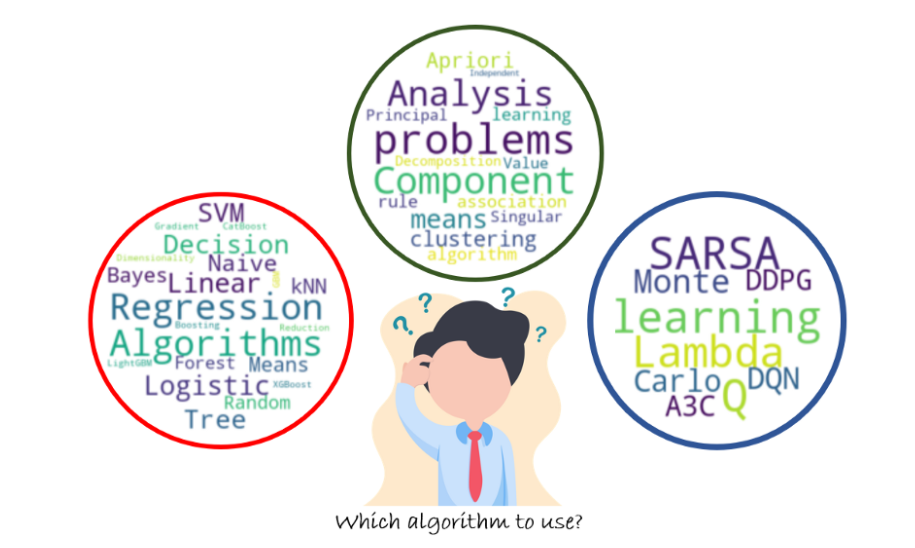

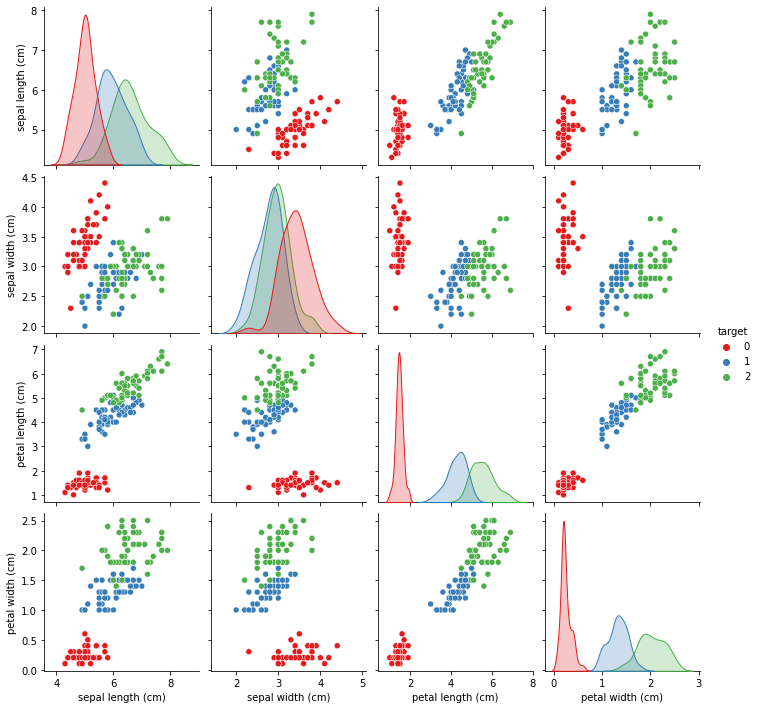

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# iris dataset
from sklearn.datasets import load_iris
# boston housing price
from sklearn.datasets import load_boston

# load iris
iris = load_iris()

# feature matrix in "X" 
X = iris.data

# target in "y"
y = iris.target

# create pandas df
data_iris = pd.DataFrame(X, columns=iris.feature_names)
data_iris['target'] = pd.DataFrame(y.reshape(-1,1), columns=["target"])
data_iris.head(5)

# check the null values
data_iris.isnull().sum()

# pairplot for distribution
sns.pairplot(data_iris ,hue="target", palette='Set1');

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# scaling features
scalar = StandardScaler()

# fit and transform scalar to train set
X_train_scaled = scalar.fit_transform(X_train)

# transform test set
X_test_scaled = scalar.transform(X_test)

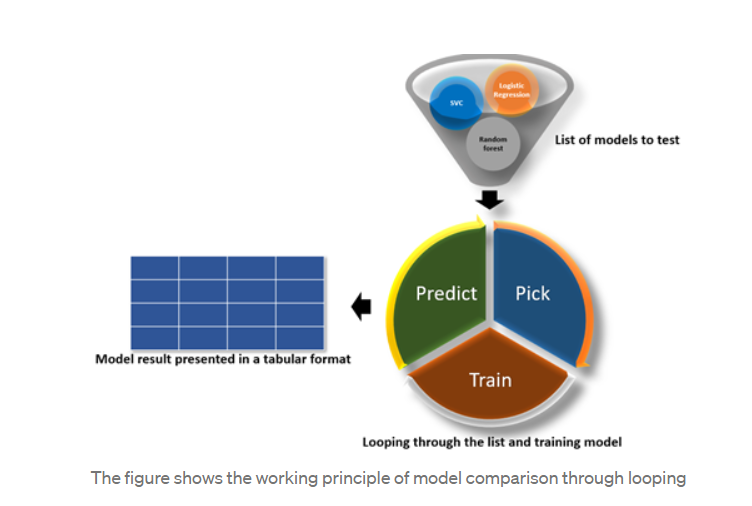

In [2]:
# importing 5 models to fit data
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# create a list
models = [
          ('LogisticRegression', LogisticRegression()), 
          ('KNN', KNeighborsClassifier()),
          ('SVC', SVC()), 
          ('RF', RandomForestClassifier()),
          ('GNB', GaussianNB())
        ]

results = []
names = []
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
target_name = ['setosa', 'versicolor', 'virginica']
for name, model in models:
        clf = model.fit(X_train_scaled, y_train)
        y_pred = clf.predict(X_test_scaled)
        print(name)
        print(classification_report(y_test, y_pred, target_names=target_name))

LogisticRegression
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

KNN
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

SVC
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00     

### Lazypredict
Lazy predict offers a quick solution to compare machine learning algorithms without writing much code. The code snippet below shows how to use lazypredict.

In [3]:
# import
from lazypredict.Supervised import LazyClassifier
# initialize
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,predictions=True)
# run test
models,predictions = clf.fit(X_train_scaled, X_test_scaled, y_train, y_test)

100%|██████████| 29/29 [00:01<00:00, 18.60it/s]


<AxesSubplot:xlabel='Model'>

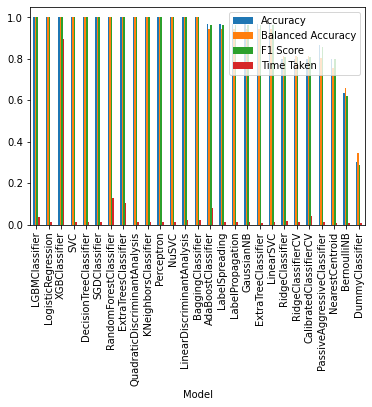

In [4]:
models.plot.bar()

### Regression algorithms comparison on the Boston housing dataset
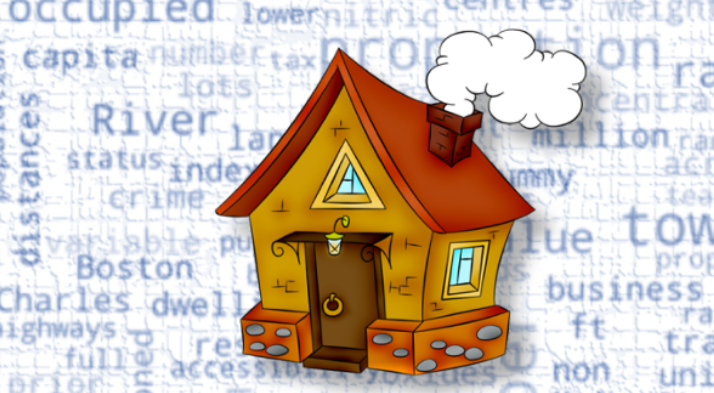

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64


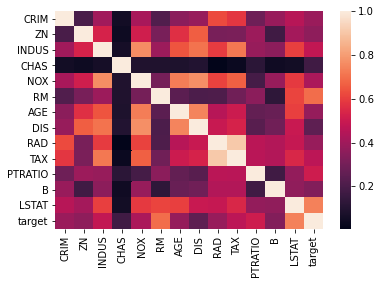

In [6]:
# load boston
boston = load_boston()

# feature matrix in "X" 
X = boston.data

# target in "y"
y = boston.target

# create pandas df
data_boston = pd.DataFrame(X, columns=boston.feature_names)
data_boston['target'] = pd.DataFrame(y.reshape(-1,1), columns=["target"])
data_boston.head(5)

# check the null values
print(data_boston.isnull().sum())

# heatmap of correlation matrix
sns.heatmap(data_boston.corr().abs());

From correlation matrix, we see TAX and RAD are highly correlated features. The columns LSTAT, INDUS, RM, TAX, NOX, PTRAIO has a correlation score above 0.5 with target.

In [7]:
data_boston_new = data_boston[['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE', 'target']]
data_boston_new.head(n=7)

,LSTAT,INDUS,NOX,PTRATIO,RM,TAX,DIS,AGE,target
0,4.98,2.31,0.54,15.30,6.58,296.00,4.09,65.20,24.00
1,9.14,7.07,0.47,17.80,6.42,242.00,4.97,78.90,21.60
2,4.03,7.07,0.47,17.80,7.18,242.00,4.97,61.10,34.70
3,2.94,2.18,0.46,18.70,7.00,222.00,6.06,45.80,33.40
4,5.33,2.18,0.46,18.70,7.15,222.00,6.06,54.20,36.20
5,5.21,2.18,0.46,18.70,6.43,222.00,6.06,58.70,28.70
6,12.43,7.87,0.52,15.20,6.01,311.00,5.56,66.60,22.90


In [8]:
# import
from lazypredict.Supervised import LazyRegressor

# initialize
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)

# run test
models,predictions = reg.fit(X_train_scaled, X_test_scaled, y_train, y_test)

100%|██████████| 42/42 [00:01<00:00, 34.07it/s]


In [10]:
models # acredito que esteja ordenado

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,1.00,1.00,0.00,0.01
XGBRegressor,0.99,0.99,0.06,0.03
ExtraTreesRegressor,0.99,0.99,0.07,0.09
GradientBoostingRegressor,0.99,0.99,0.07,0.04
BaggingRegressor,0.99,0.99,0.07,0.03
RandomForestRegressor,0.99,0.99,0.08,0.12
HistGradientBoostingRegressor,0.97,0.97,0.12,0.08
LGBMRegressor,0.97,0.97,0.13,0.03
AdaBoostRegressor,0.96,0.97,0.13,0.06


<AxesSubplot:xlabel='Model'>

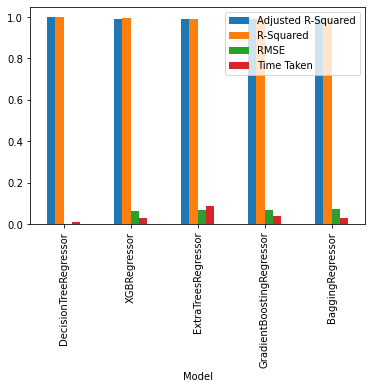

In [11]:
models[0:5].plot.bar()

<AxesSubplot:xlabel='Model'>

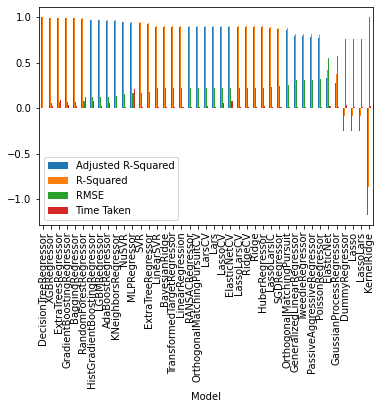

In [12]:
models.plot.bar()